<a href="https://colab.research.google.com/github/rautnavnath/PythonProjects/blob/main/Process_drift_in_Injection_Molding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Manufacturing process drift detection using numpy, pandas & matplotlib
by Navnath R Raut

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
from pandas.io.excel import read_excel
Master_parameters = read_excel("/content/Ideal_parameters_350T_CT.xlsx")
Master_parameters.drop(columns='Shot_No', inplace=True)

In [139]:
Master_parameters.head()

,Cushion(mm),T1('C),T2('C),T3('C),T4('C),T5('C),T6('C),Mold Temp('C),Fill Time(sec),Cycle Time(sec)
0,5.0,310.5,320.5,315.7,290.5,280.5,270.5,88.3,6.7,65.2
1,5.3,313.3,323.3,320.0,293.3,283.3,273.3,89.7,6.5,65.1
2,4.3,303.3,313.3,305.0,283.3,273.3,263.3,88.3,6.3,66.6
3,5.3,313.2,323.2,319.9,293.2,283.2,273.2,87.3,6.0,65.8
4,5.6,316.2,326.2,324.3,296.2,286.2,276.2,85.5,6.8,66.3


In [140]:
Master_parameters.describe()

,Cushion(mm),T1('C),T2('C),T3('C),T4('C),T5('C),T6('C),Mold Temp('C),Fill Time(sec),Cycle Time(sec)
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,4.993600,309.955200,319.955200,314.931600,289.955200,279.955200,269.955200,87.655600,6.486400,66.405200
std,0.596946,5.963873,5.963873,8.943711,5.963873,5.963873,5.963873,1.436888,0.286467,0.815471
min,4.000000,300.000000,310.000000,300.000000,280.000000,270.000000,260.000000,85.100000,6.000000,65.000000
25%,4.500000,304.825000,314.825000,307.225000,284.825000,274.825000,264.825000,86.300000,6.200000,65.800000
50%,5.000000,309.950000,319.950000,314.900000,289.950000,279.950000,269.950000,87.800000,6.500000,66.300000
75%,5.500000,315.400000,325.400000,323.200000,295.400000,285.400000,275.400000,88.900000,6.700000,67.100000
max,6.000000,320.000000,330.000000,330.000000,300.000000,290.000000,280.000000,90.000000,7.000000,67.900000


In [141]:
Actual_parameters11 = read_excel("/content/Actual_parameters_350T_CT11July.xlsx")

In [142]:
Actual_parameters11.head()

,Cushion(mm),T1('C),T2('C),T3('C),T4('C),T5('C),T6('C),Mold Temp('C),Fill Time(sec),Cycle Time(sec)
0,5.0,311,322,317,291,281,271,88,6.7,65.2
1,5.2,314,326,320,293,284,274,90,5.6,64.2
2,4.0,306,314,307,284,274,264,88,5.7,66.0
3,4.8,316,325,322,293,284,273,88,5.6,65.4
4,5.1,316,329,326,297,287,277,86,6.7,66.2


In [143]:
Actual_parameters11.describe()

,Cushion(mm),T1('C),T2('C),T3('C),T4('C),T5('C),T6('C),Mold Temp('C),Fill Time(sec),Cycle Time(sec)
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.0000,250.000000,250.00000,250.000000,250.000000
mean,4.756400,311.928000,321.536000,315.960000,290.408000,280.4760,270.480000,87.88800,5.982400,65.901200
std,0.611584,6.114275,5.979273,9.008608,5.973968,5.9894,5.943644,1.49008,0.420473,0.885423
min,3.500000,301.000000,311.000000,301.000000,280.000000,270.0000,260.000000,85.00000,5.100000,64.200000
25%,4.200000,306.250000,316.000000,308.000000,285.000000,276.0000,265.000000,86.25000,5.700000,65.225000
50%,4.800000,311.000000,322.000000,316.000000,290.000000,280.0000,270.000000,88.00000,6.000000,65.900000
75%,5.300000,317.000000,327.000000,324.000000,296.000000,286.0000,276.000000,89.00000,6.300000,66.600000
max,6.000000,324.000000,332.000000,332.000000,301.000000,290.0000,281.000000,90.00000,6.900000,67.800000


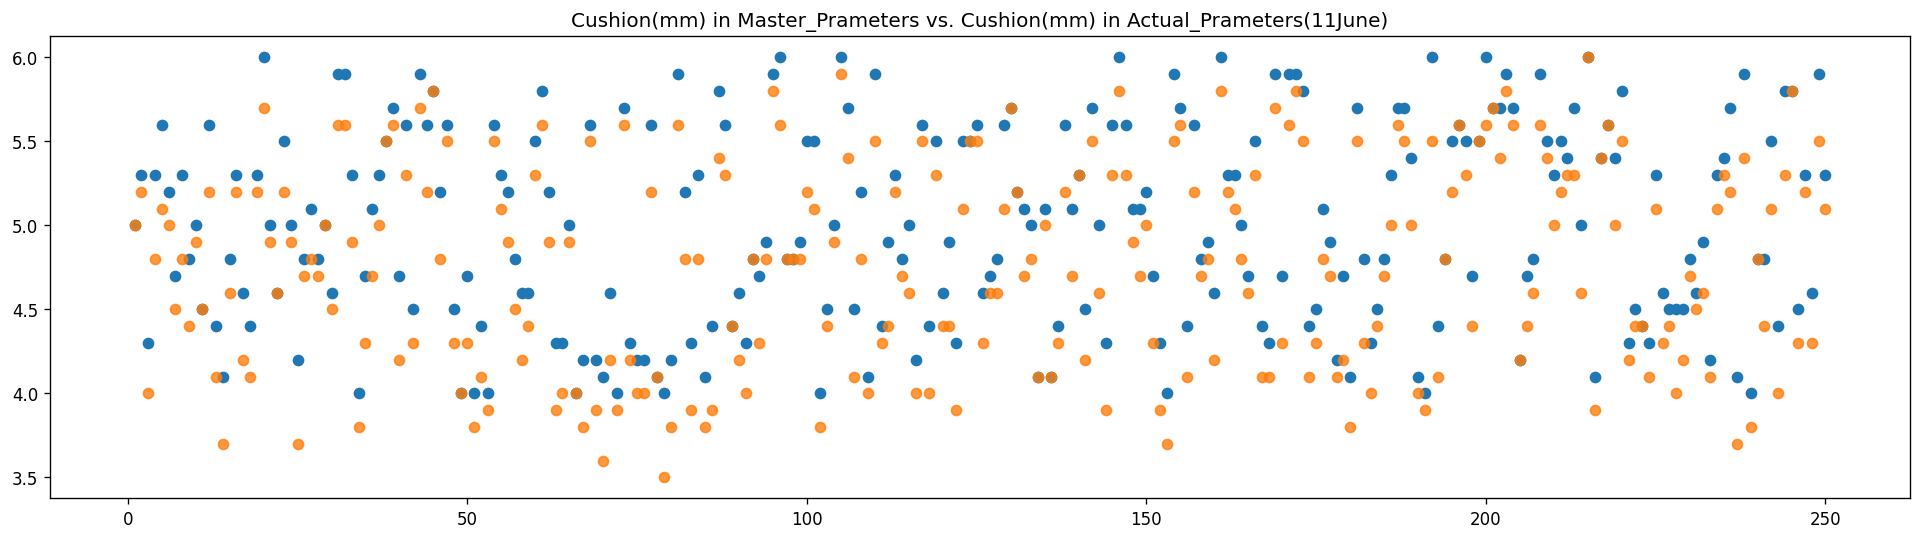

In [144]:
plt.figure(figsize=(20,5),dpi=120)
plt.scatter(np.arange(1,251),Master_parameters['Cushion(mm)'], alpha=1)
plt.scatter(np.arange(1,251),Actual_parameters11['Cushion(mm)'], alpha=.8)
#plt.plot(Master_parameters['Cushion(mm)'],Actual_parameters11['Cushion(mm)',alpha=1],
#             color='#42a1f5')
plt.title("Cushion(mm) in Master_Prameters vs. Cushion(mm) in Actual_Prameters(11June)")
plt.show()

##Find Shift in Parameters w.r.t Master

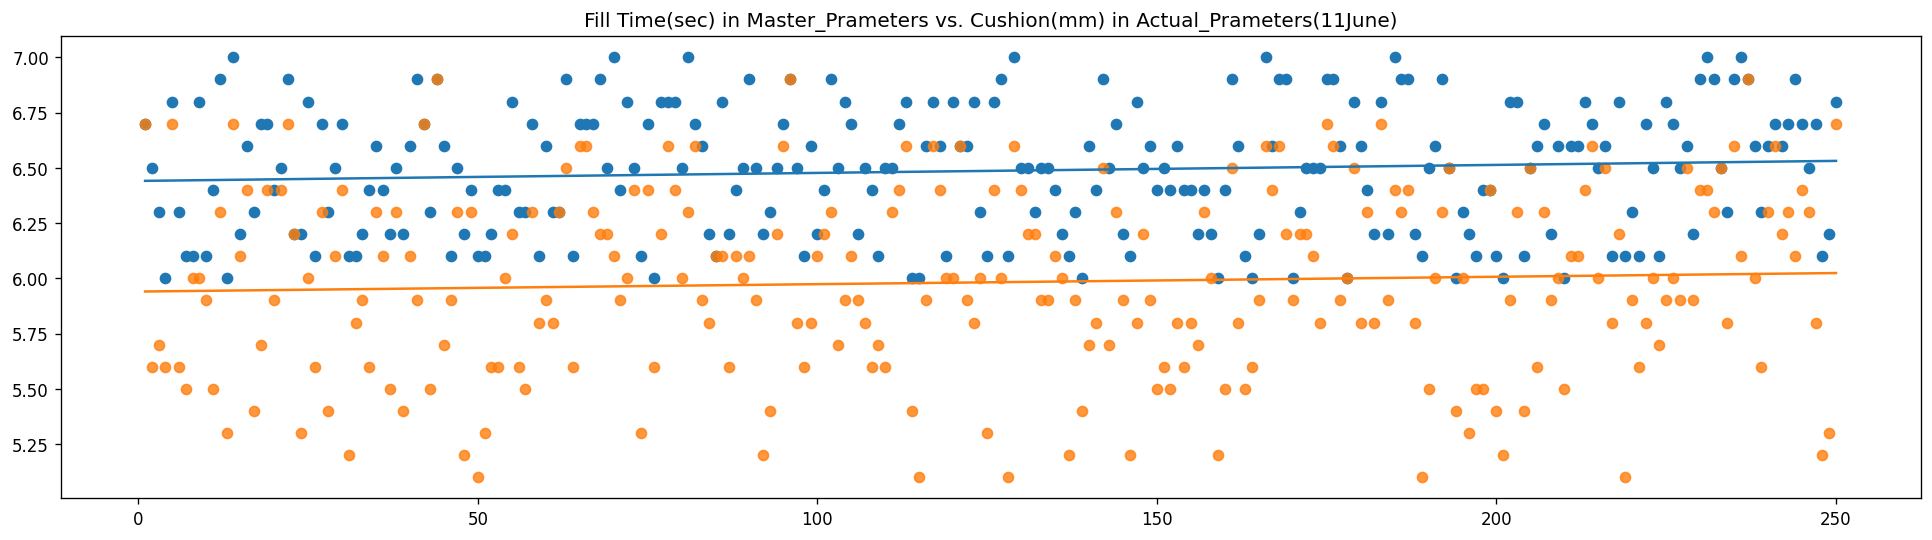

In [145]:
plt.figure(figsize=(20,5),dpi=120)
x=np.arange(1,251)
y_M=Master_parameters['Fill Time(sec)']
y_A=Actual_parameters11['Fill Time(sec)']
plt.scatter(x,y_M, alpha=1)
plt.scatter(x,y_A, alpha=.8)
z = np.polyfit(x, y_M, 1)
p = np.poly1d(z)
plt.plot(x,p(x))
z1 = np.polyfit(x, y_A, 1)
p1 = np.poly1d(z1)
plt.plot(x,p1(x))
#plt.plot(Master_parameters['Cushion(mm)'],Actual_parameters11['Cushion(mm)',alpha=1],
#             color='#42a1f5')
plt.title("Fill Time(sec) in Master_Prameters vs. Cushion(mm) in Actual_Prameters(11June)")
plt.show()

In [146]:
#Coeffcinet & intercept in Master Fill Time
p

poly1d([3.62655402e-04, 6.44088675e+00])

In [147]:
#Coeffcinet & intercept in Master Fill Time
p1

poly1d([3.34699755e-04, 5.94039518e+00])

In [148]:
#Mean shift
p-p1

poly1d([2.79556473e-05, 5.00491566e-01])

Mean shift of Appx 0.5 sec detected from above analysis

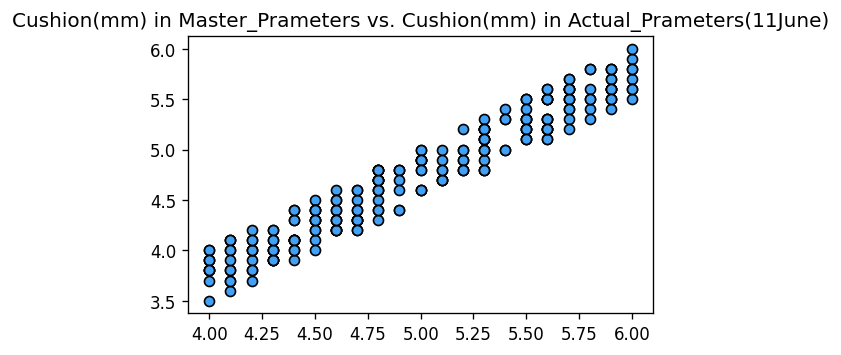

In [149]:
plt.figure(figsize=(5,3),dpi=120)
plt.scatter(Master_parameters['Cushion(mm)'],Actual_parameters11['Cushion(mm)'],
            edgecolor='k', color='#42a1f5')
plt.title("Cushion(mm) in Master_Prameters vs. Cushion(mm) in Actual_Prameters(11June)")
plt.show()

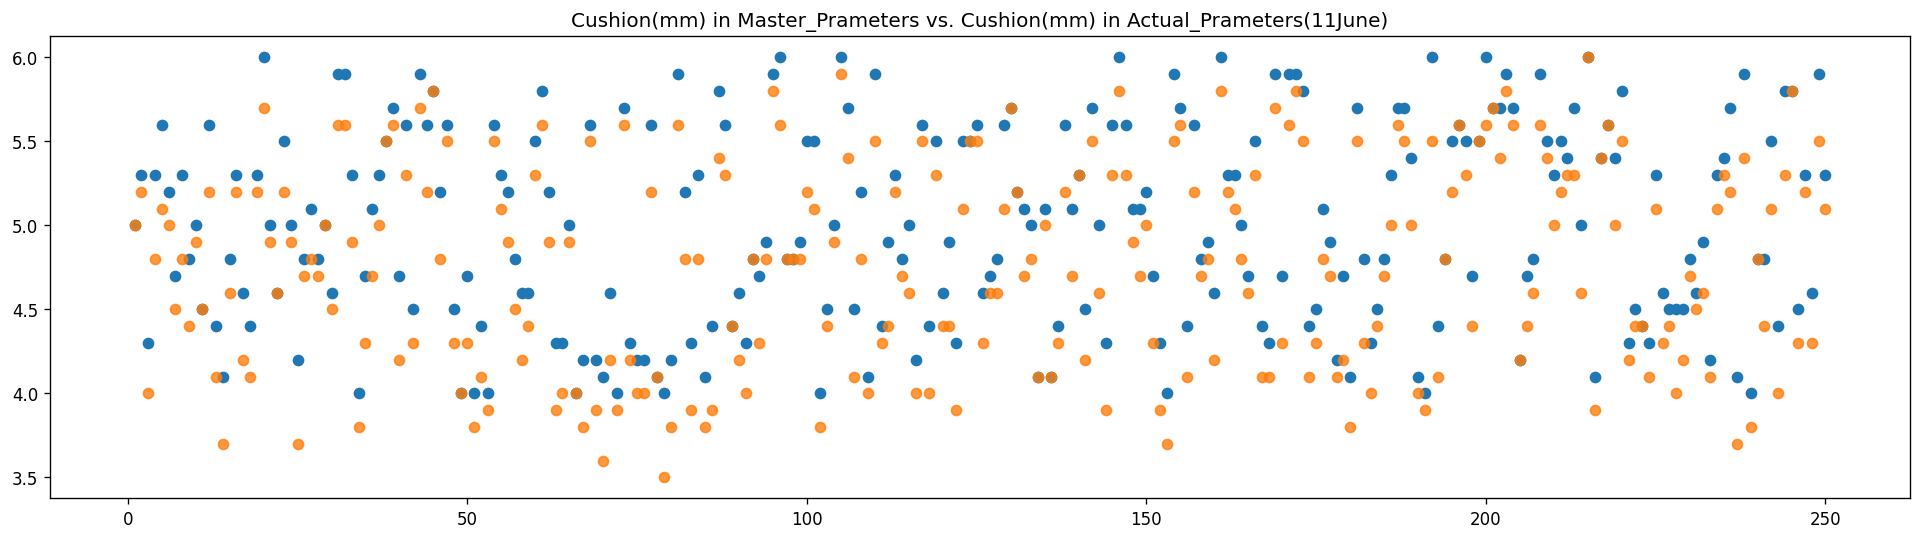

In [150]:
plt.figure(figsize=(20,5),dpi=120)
plt.scatter(np.arange(1,251),Master_parameters['Cushion(mm)'], alpha=1)
plt.scatter(np.arange(1,251),Actual_parameters11['Cushion(mm)'], alpha=.8)
#plt.plot(Master_parameters['Cushion(mm)'],Actual_parameters11['Cushion(mm)',alpha=1],
#             color='#42a1f5')
plt.title("Cushion(mm) in Master_Prameters vs. Cushion(mm) in Actual_Prameters(11June)")
plt.show()

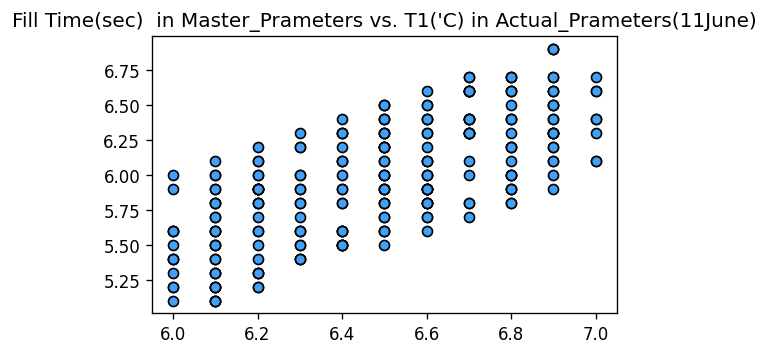

In [151]:
plt.figure(figsize=(5,3),dpi=120)
plt.scatter(Master_parameters["Fill Time(sec)"],Actual_parameters11["Fill Time(sec)"],
            edgecolor='k', color='#42a1f5')
plt.title("Fill Time(sec)  in Master_Prameters vs. T1('C) in Actual_Prameters(11June)")
plt.show()

In [152]:
Master_parameters.corrwith(Actual_parameters11,axis=0)

Cushion(mm)        0.968920
T1('C)             0.979820
T2('C)             0.989735
T3('C)             0.997148
T4('C)             0.997791
T5('C)             0.997813
T6('C)             0.997897
Mold Temp('C)      0.974919
Fill Time(sec)     0.718520
Cycle Time(sec)    0.943996
dtype: float64

In [153]:
Master_parameters.iloc[:,:]

,Cushion(mm),T1('C),T2('C),T3('C),T4('C),T5('C),T6('C),Mold Temp('C),Fill Time(sec),Cycle Time(sec)
0,5.0,310.5,320.5,315.7,290.5,280.5,270.5,88.3,6.7,65.2
1,5.3,313.3,323.3,320.0,293.3,283.3,273.3,89.7,6.5,65.1
2,4.3,303.3,313.3,305.0,283.3,273.3,263.3,88.3,6.3,66.6
3,5.3,313.2,323.2,319.9,293.2,283.2,273.2,87.3,6.0,65.8
4,5.6,316.2,326.2,324.3,296.2,286.2,276.2,85.5,6.8,66.3
...,...,...,...,...,...,...,...,...,...,...
245,4.5,304.7,314.7,307.0,284.7,274.7,264.7,86.9,6.5,67.4
246,5.3,312.6,322.6,319.0,292.6,282.6,272.6,89.4,6.7,66.0
247,4.6,305.9,315.9,308.8,285.9,275.9,265.9,85.6,6.1,67.0
248,5.9,319.4,329.4,329.2,299.4,289.4,279.4,87.3,6.2,65.1


In [156]:
for a in Master_parameters:
  print(a)


Cushion(mm)
T1('C)
T2('C)
T3('C)
T4('C)
T5('C)
T6('C)
Mold Temp('C)
Fill Time(sec)
Cycle Time(sec)


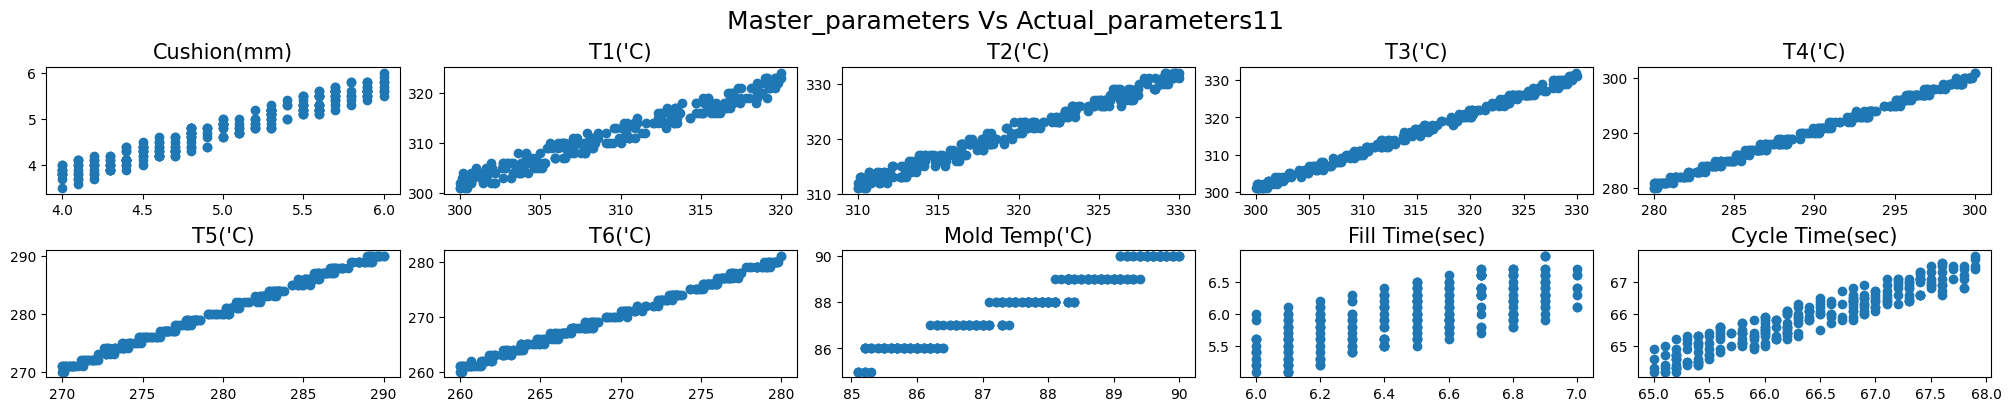

In [169]:
fig,ax  = plt.subplots(2,5,figsize=(20,4), layout='constrained')
plt.suptitle("Master_parameters Vs Actual_parameters11", fontsize=18,va='top')
ax = ax.ravel()
for i in range(10):
    ax[i].scatter(Master_parameters.iloc[:,i],Actual_parameters11.iloc[:,i])
    ax[i].set_title(Master_parameters.columns[i],fontsize=15)
plt.show()

<Figure size 768x576 with 0 Axes>

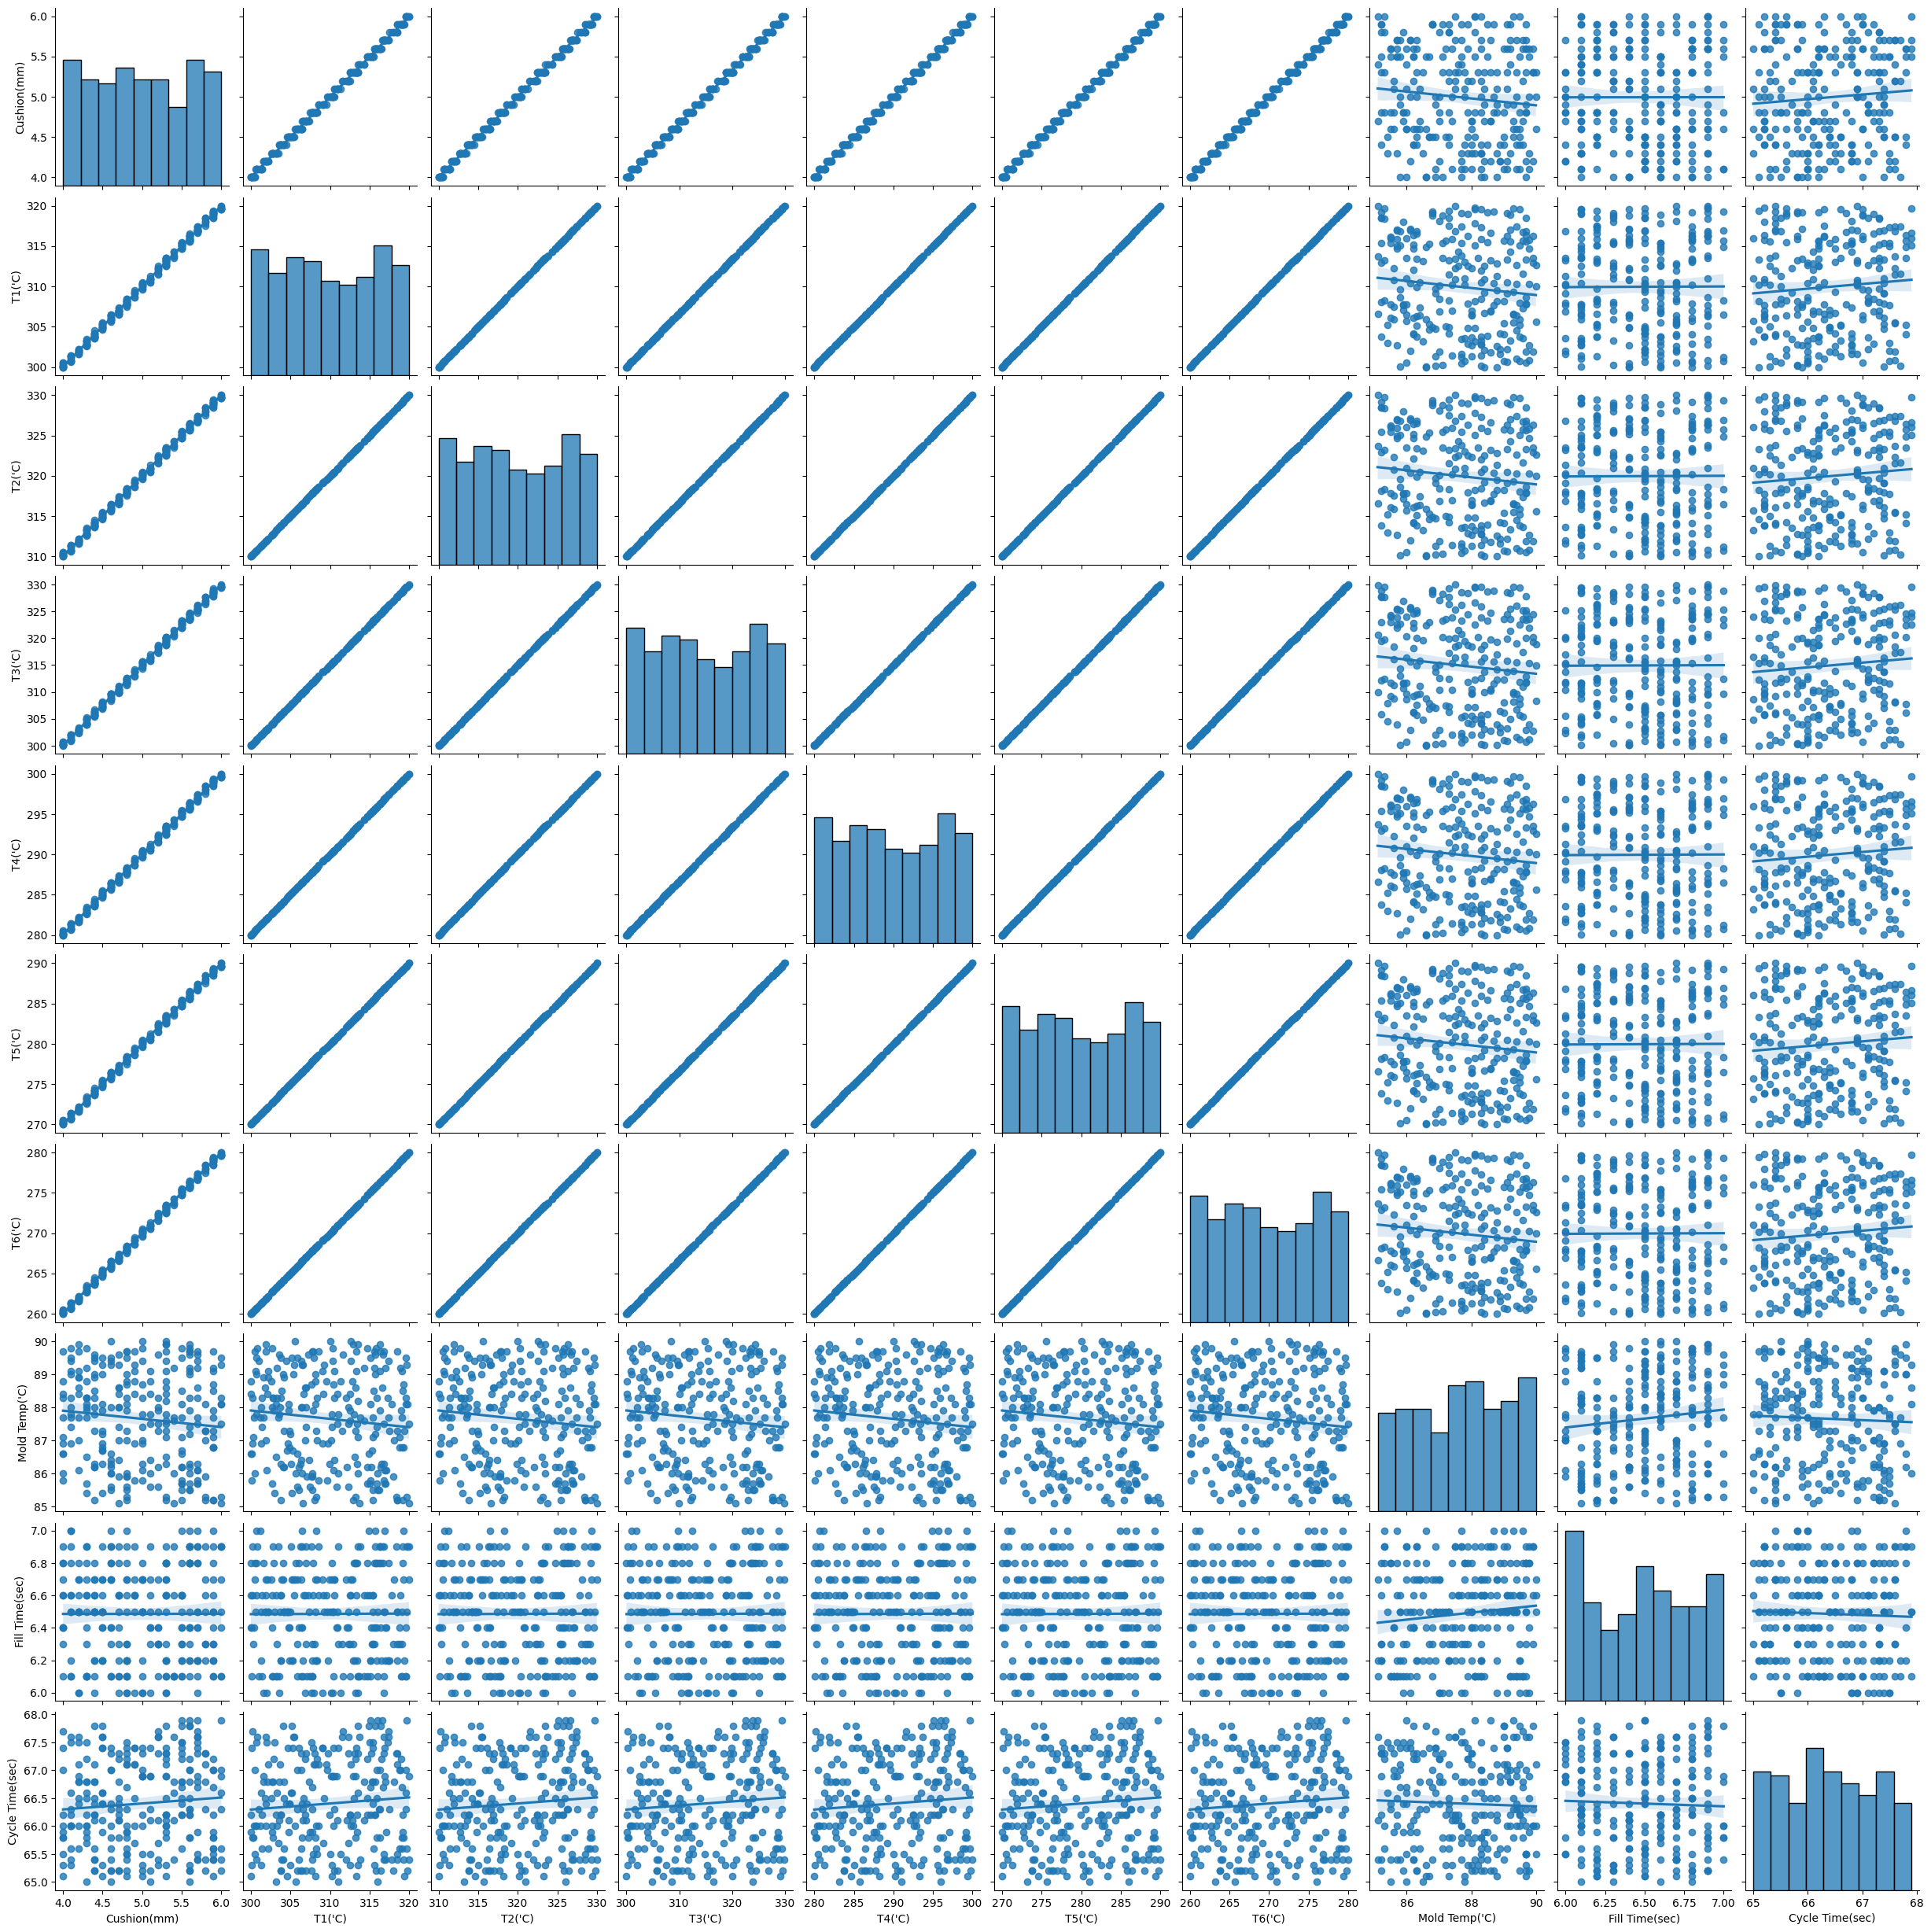

In [176]:
plt.figure(dpi=120)
sns.pairplot(data=Master_parameters, kind= 'reg')
plt.show()

<Figure size 768x576 with 0 Axes>

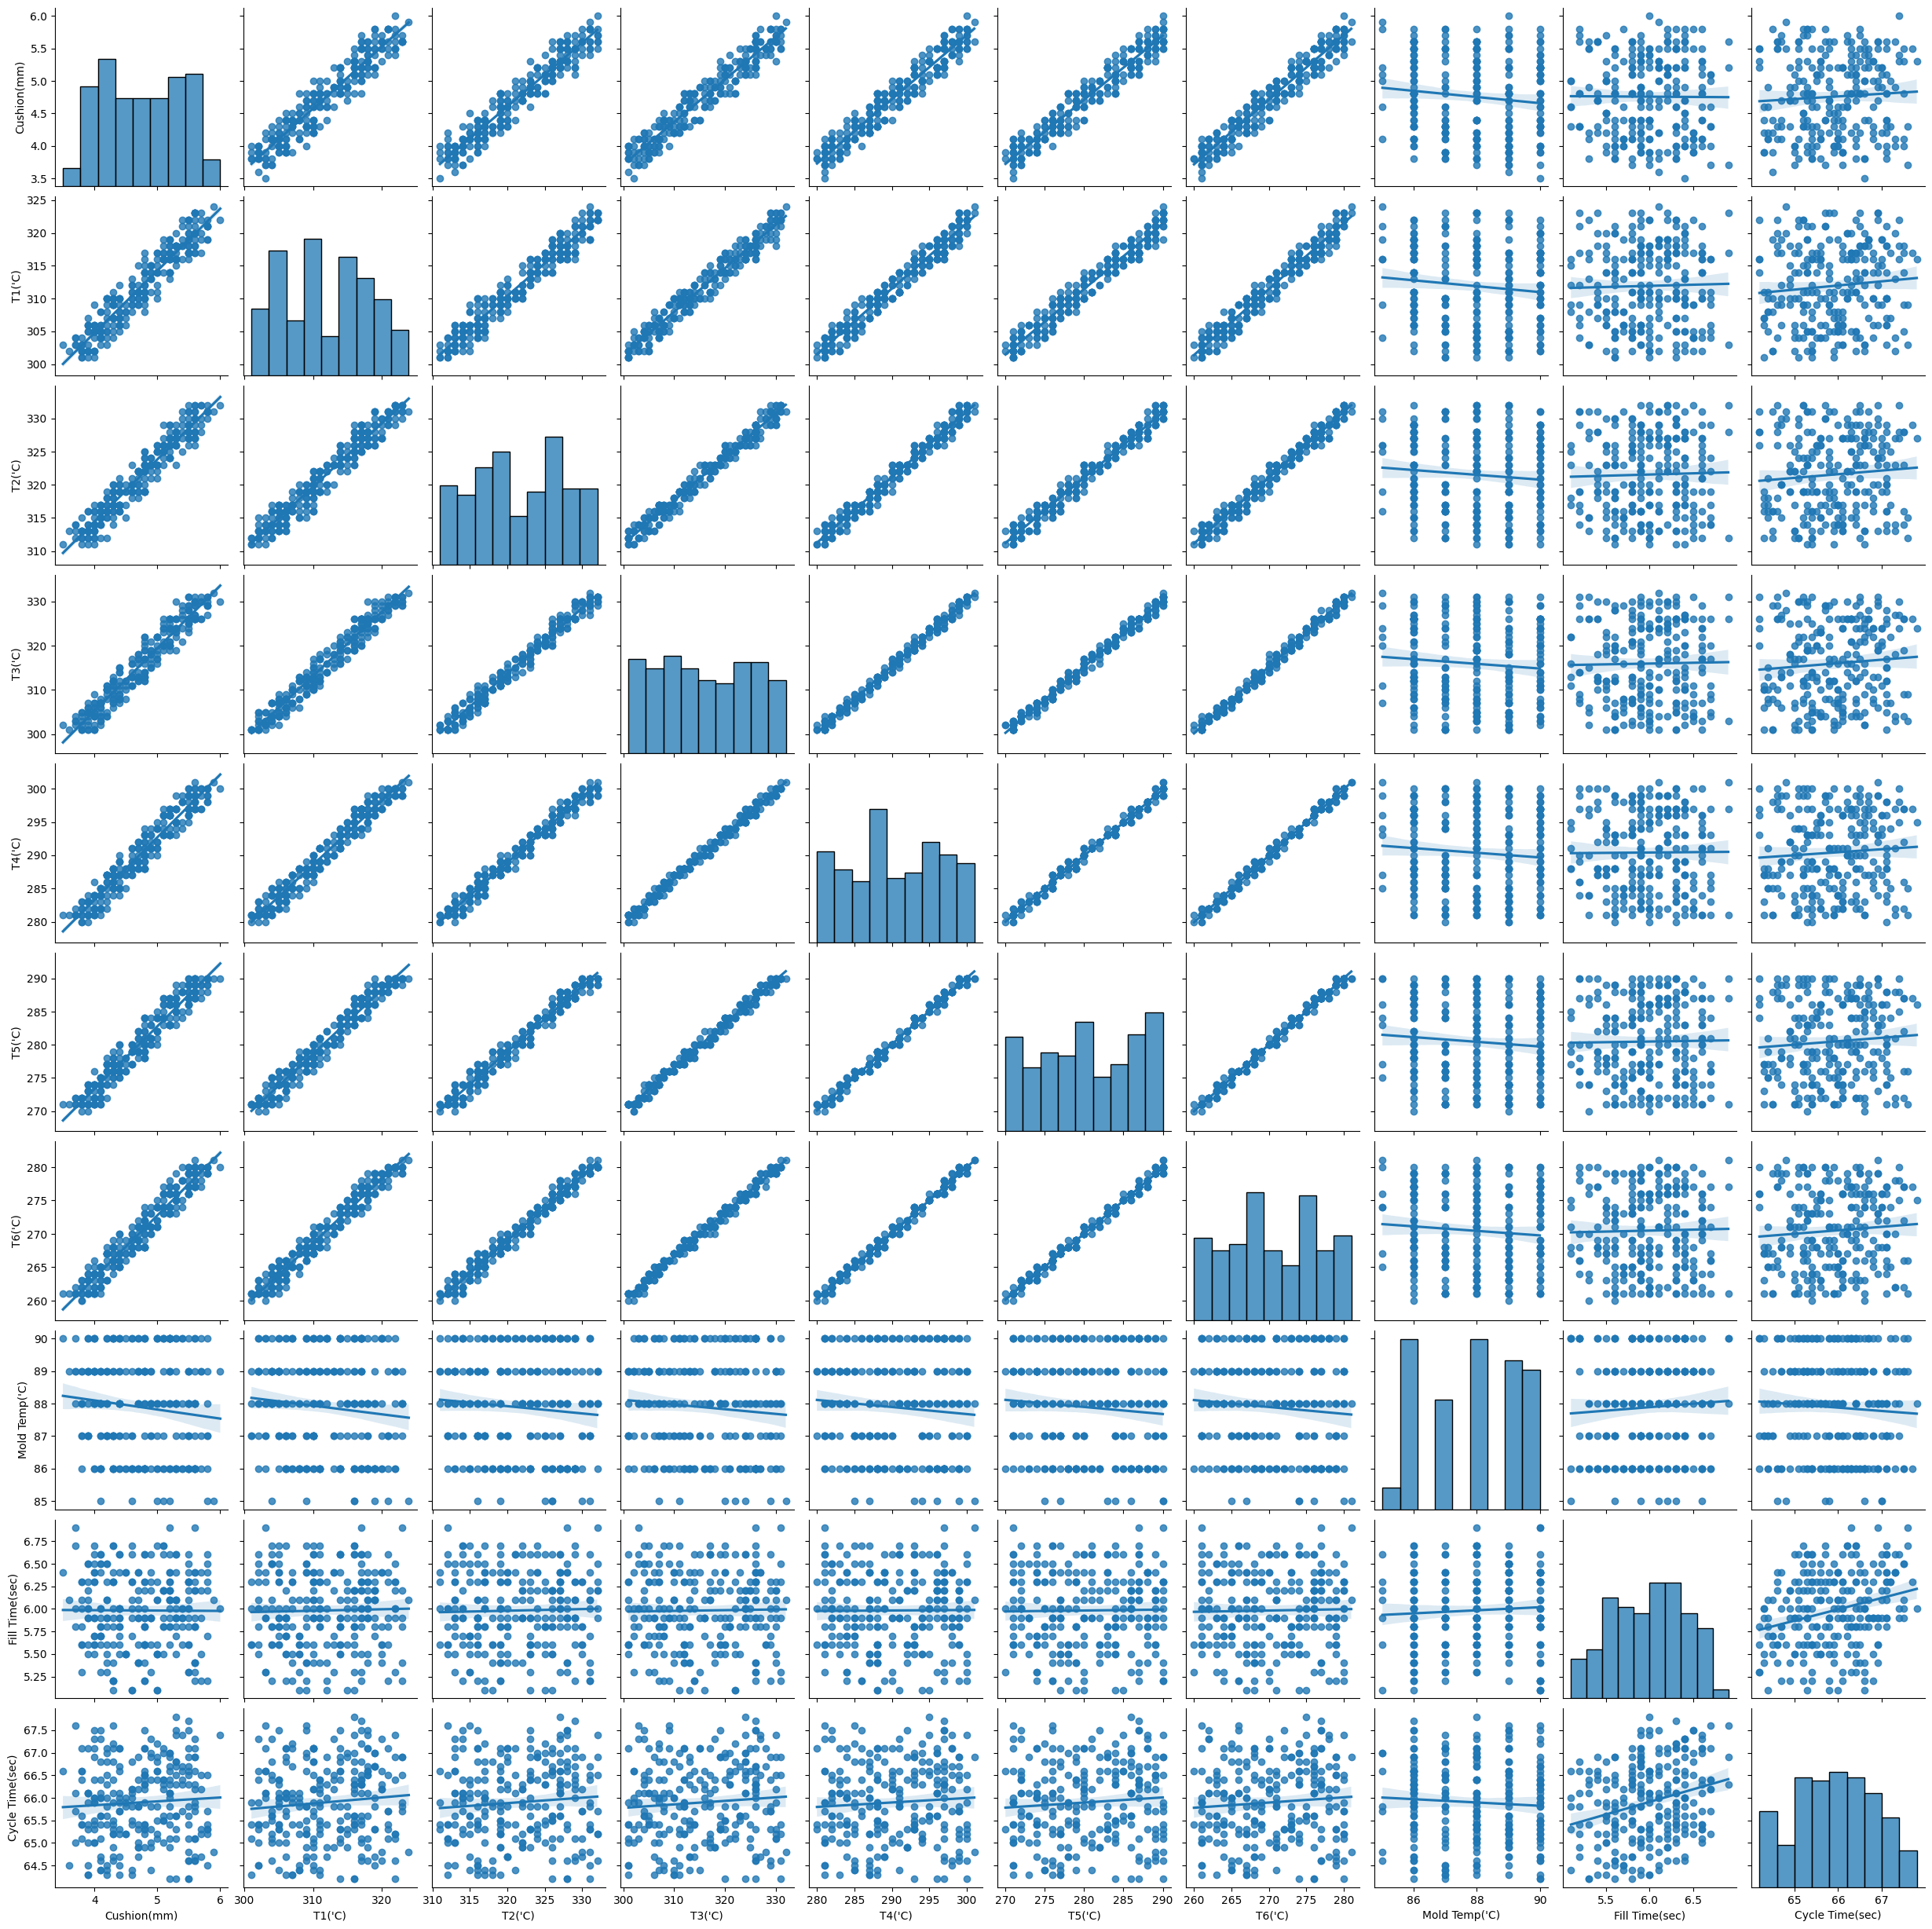

In [177]:
plt.figure(dpi=120)
sns.pairplot(data=Actual_parameters11, kind='reg')
plt.show()

In [192]:
score = round(Master_parameters.corrwith(Actual_parameters11,axis=0),2)
corr_score = pd.Series(score)

In [193]:
corr_score

Cushion(mm)        0.97
T1('C)             0.98
T2('C)             0.99
T3('C)             1.00
T4('C)             1.00
T5('C)             1.00
T6('C)             1.00
Mold Temp('C)      0.97
Fill Time(sec)     0.72
Cycle Time(sec)    0.94
dtype: float64

In [207]:
corr_score

0.97

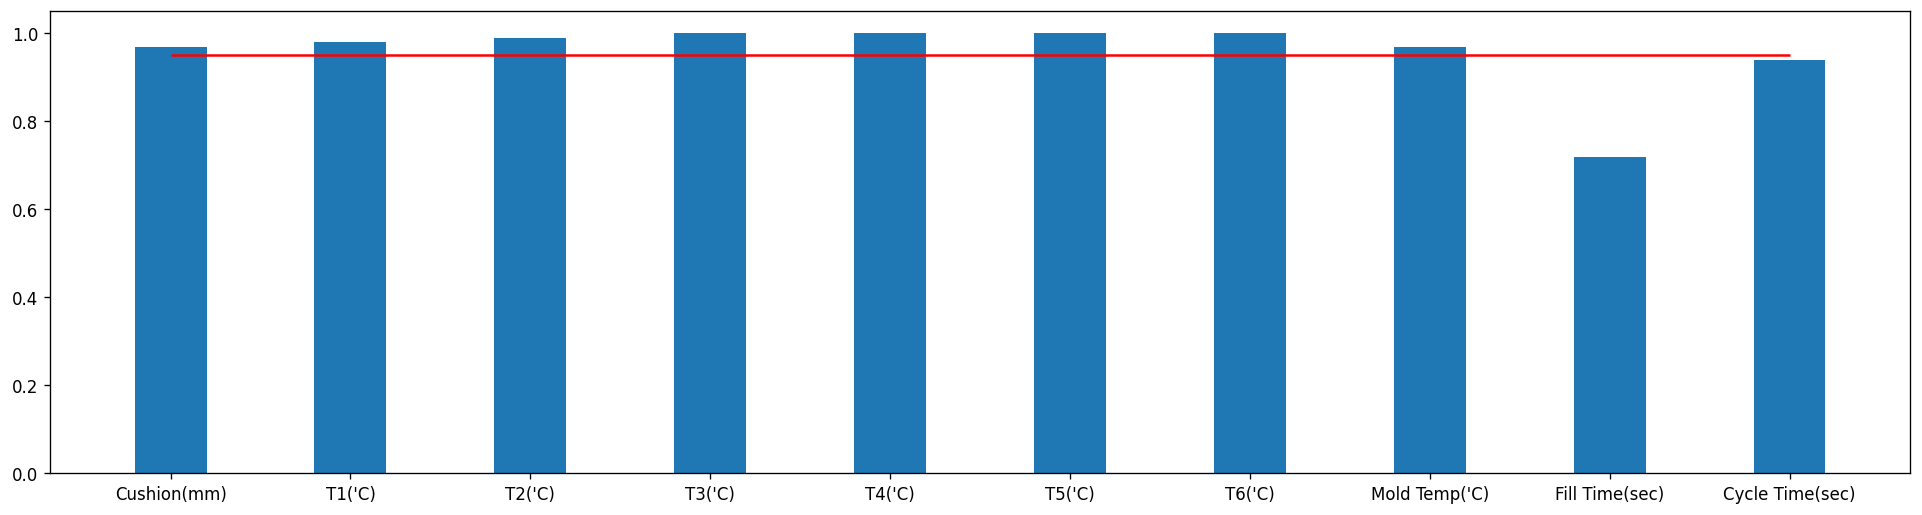

In [209]:
plt.figure(figsize=(20,5),dpi=120)
plt.bar(corr_score.index, corr_score,width = 0.4)
plt.hlines(0.95,'Cushion(mm)', 'Cycle Time(sec)' , colors='red')

Here we Conclude that Fill Time & Cycle time is Deviated from Master Parameters and Process need to be reset